In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv', encoding='latin-1')
print(f"Initial shape: {df.shape}")

Initial shape: (541909, 8)


In [ ]:
df_clean = df.dropna(subset=['CustomerID']).copy()
print(f"Shape after removing missing CustomerID: {df_clean.shape}")

Shape after removing missing CustomerID: (406829, 8)


In [ ]:
df_clean = df_clean[df_clean['Quantity'] > 0].copy()
print(f"Shape after filtering negative Quantity: {df_clean.shape}")

Shape after filtering negative Quantity: (397924, 8)


In [ ]:
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']
print(" TotalPrice column added.")

 TotalPrice column added.


In [ ]:
print("\n Converting 'InvoiceDate' to datetime...")
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], errors='coerce')
initial_len = len(df_clean)
df_clean = df_clean.dropna(subset=['InvoiceDate']).copy()
dropped = initial_len - len(df_clean)
if dropped > 0:
    print(f"  Dropped {dropped} rows due to invalid dates.")
print(" InvoiceDate converted to datetime.")

print(f"\n Final cleaned dataset shape: {df_clean.shape}")
print("\n Sample of cleaned data:")
print(df_clean.head())

df_clean.to_csv('cleaned_data.csv', index=False)
print("\n Cleaned data saved to 'cleaned_data.csv'")


 Converting 'InvoiceDate' to datetime...
 InvoiceDate converted to datetime.

 Final cleaned dataset shape: (397924, 9)

 Sample of cleaned data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0 

In [ ]:
import pandas as pd

print(" Loading cleaned data...")
df = pd.read_csv('cleaned_data.csv')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

print("🇬🇧 Filtering data for United Kingdom...")
df_uk = df[df['Country'] == 'United Kingdom'].copy()
print(f"UK transactions: {len(df_uk):,}")

print("\n Calculating total quantities sold per product...")
top_products = (
    df_uk
    .groupby(['StockCode', 'Description'])
    .agg(TotalQuantity=('Quantity', 'sum'))
    .reset_index()
    .sort_values('TotalQuantity', ascending=False)
    .head(5)
)

print("\n Top 5 Best-Selling Products in the UK (by Quantity Sold):\n")
print(top_products.to_string(index=False))

top_products.to_csv('top_5_best_selling_uk_products.csv', index=False)
print("\n Results saved to 'top_5_best_selling_uk_products.csv'")

 Loading cleaned data...
🇬🇧 Filtering data for United Kingdom...
UK transactions: 354,345

 Calculating total quantities sold per product...

 Top 5 Best-Selling Products in the UK (by Quantity Sold):

StockCode                        Description  TotalQuantity
    23843        PAPER CRAFT , LITTLE BIRDIE          80995
    23166     MEDIUM CERAMIC TOP STORAGE JAR          76919
    84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS          49182
   85099B            JUMBO BAG RED RETROSPOT          41981
   85123A WHITE HANGING HEART T-LIGHT HOLDER          34648

 Results saved to 'top_5_best_selling_uk_products.csv'


In [ ]:
import pandas as pd
print(" Loading cleaned data...")
df = pd.read_csv('cleaned_data.csv')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

print(" Filtering for INTERNATIONAL markets (excluding UK)...")
df_international = df[df['Country'] != 'United Kingdom'].copy()
print(f"International transactions: {len(df_international):,}")

print("\n Calculating total revenue per international country...")
top_markets = (
    df_international
    .groupby('Country')
    .agg(TotalRevenue=('TotalPrice', 'sum'))
    .reset_index()
    .sort_values('TotalRevenue', ascending=False)
    .head(5)
)

print("\n Top 5 International Markets (by Total Revenue):\n")
top_markets['TotalRevenue'] = top_markets['TotalRevenue'].round(2)
print(top_markets.to_string(index=False))

top_markets.to_csv('top_5_international_markets.csv', index=False)
print("\n Results saved to 'top_5_international_markets.csv'")

 Loading cleaned data...
 Filtering for INTERNATIONAL markets (excluding UK)...
International transactions: 43,579

 Calculating total revenue per international country...

 Top 5 International Markets (by Total Revenue):

    Country  TotalRevenue
Netherlands     285446.34
       EIRE     265545.90
    Germany     228867.14
     France     209024.05
  Australia     138521.31

 Results saved to 'top_5_international_markets.csv'


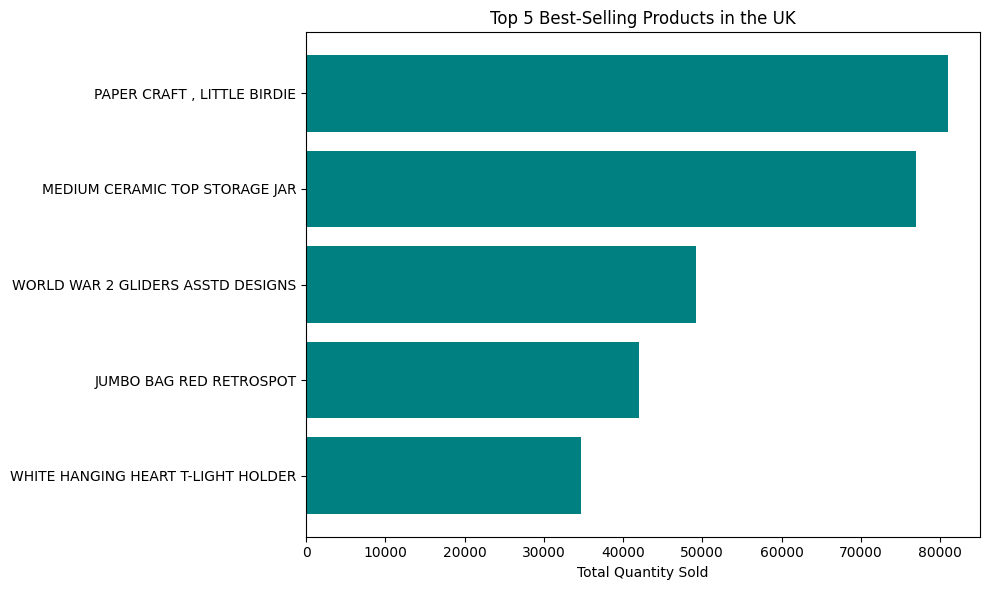

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_products['Description'], top_products['TotalQuantity'], color='teal')
plt.xlabel('Total Quantity Sold')
plt.title('Top 5 Best-Selling Products in the UK')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

/tmp/ipython-input-600785662.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['YearMonth'] = df_top['InvoiceDate'].dt.to_period('M')


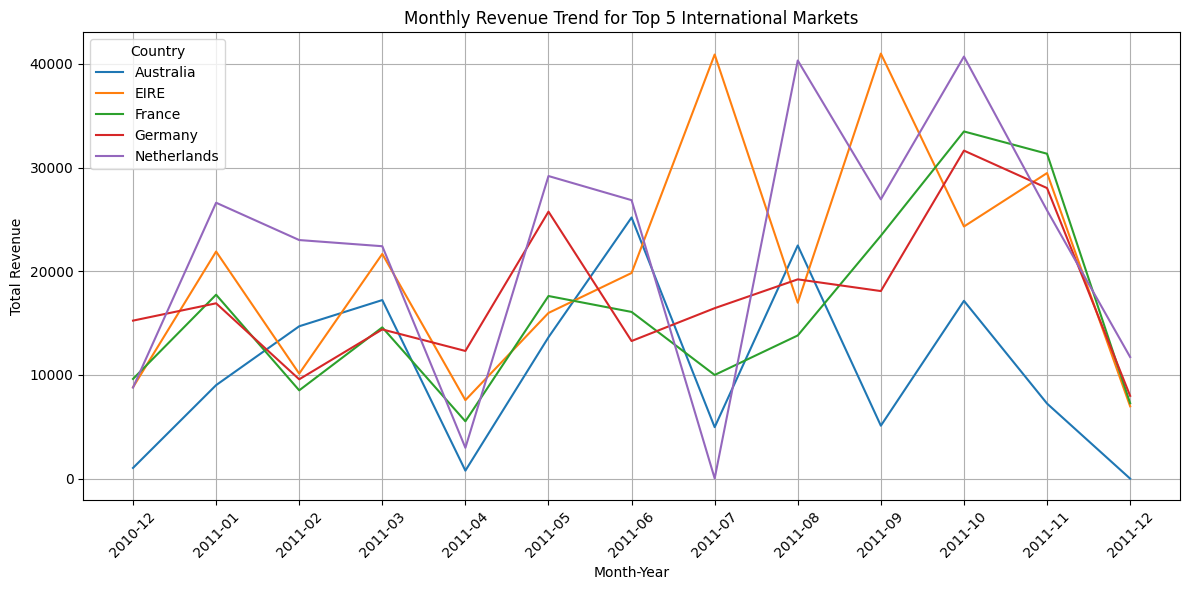

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_data.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df_international = df[df['Country'] != 'United Kingdom'].copy()

top_countries = (
    df_international.groupby('Country')['TotalPrice'].sum().nlargest(5).index
)

df_top = df_international[df_international['Country'].isin(top_countries)]

df_top['YearMonth'] = df_top['InvoiceDate'].dt.to_period('M')
revenue_trend = df_top.groupby(['YearMonth', 'Country'])['TotalPrice'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
for country in revenue_trend.columns:
    plt.plot(revenue_trend.index.astype(str), revenue_trend[country], label=country)
plt.title('Monthly Revenue Trend for Top 5 International Markets')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()